# Đánh giá mức độ đa dạng của các sản phẩm khách hàng truy cập trên web

Mục tiêu có phân tích này nhằm xác định xem liệu rằng việc khách hàng xem nhiều đối với một loại sản phẩm có ảnh hưởng đến việc họ quyết định mua loại sản phẩm đó hay không. Nếu có mối liên hệ giữa 2 điều này, thì độ đa dạng của các lựa chọn (tức loại sản phẩm) được hiển thị trên web có thể là nguyên nhân dẫn đến việc khách hàng chỉ tập trung mua 1 hoặc 2 loại sản phẩm cho 1 đơn hàng, dẫn đến số tiền chi cho mỗi đơn hàng thấp.

Nhập các thư viện và các bảng dữ liệu cần thiết cho việc phân tích

In [14]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

In [15]:
df_event= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/events.csv')
df_order= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/orders.csv')
df_orderde= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/order_details.csv')
df_item= pd.read_csv('[DAZONE 2023] Dataset vòng 2/[Viettel] Ecommerce Dataset/items.csv')

In [16]:
df_event.head()

,id,cus_id,sequence_number,session_id,created_at,ip,city,state,postal,browser,traffic_src,path,event_type
0,551,34.0,12,3c06e3f2-e8ed-4eb6-b24c-ccec40b8c2e7,2019-08-16 06:37:53 UTC,106.89.165.48,Kansas City,Kansas,66102,Chrome,Email,/cart,cart
1,1730,106.0,6,6d550704-9304-48df-990d-01fdbb676694,2021-02-22 05:56:40 UTC,103.12.134.61,New York,New York,11372,Chrome,Email,/cart,cart
2,2093,136.0,3,88457dec-f879-4f47-9585-98067ff94d75,2020-01-15 01:35:00 UTC,209.79.4.205,Beijing,Tianjin,300456,Firefox,Email,/cart,cart
3,2190,138.0,3,2729a4a5-1177-4a13-8419-f5f79f350876,2021-03-02 09:15:42 UTC,56.27.73.26,Quanzhou,Liaoning,110041,Chrome,Email,/cart,cart
4,2882,186.0,4,0933c284-960e-4f9b-9950-82e2d831c8e4,2020-01-19 00:54:42 UTC,45.195.175.235,Currais Novos,Rio Grande do Norte,59380-000,Safari,Email,/cart,cart


In [17]:
#Xem xét các giá trị cột path
df_event['path'].unique()

array(['/cart', '/home', '/cancel', ...,
       '/department/women/category/blazers&jackets/brand/rails',
       '/department/women/category/outerwear&coats/brand/gbyguess',
       '/department/women/category/maternity/brand/hyp'], dtype=object)

Phân tích các hoạt động '/department' trong cột path để xem xét rằng người dùng trên web đang xem những sản phẩm nào. Bởi vì theo như quan sát dữ liệu, các dữ liệu này thể hiện đường dẫn đến loại sản phẩm mà người dùng xem. 

In [18]:
#Lọc dữ liệu theo đường dẫn bắt đầu bằng 'department'
filtered_table= df_event[df_event['path'].str.startswith(('/department'))]
filtered_table.head()

,id,cus_id,sequence_number,session_id,created_at,ip,city,state,postal,browser,traffic_src,path,event_type
631405,191,13.0,4,7fffdeaa-ebc8-404a-a273-1587389ead95,2019-04-22 11:21:39 UTC,27.229.4.93,Baoding,Guangdong,523900,Safari,Email,/department/men/category/swim/brand/kanusurf,department
631406,1373,80.0,1,8ade31d7-5cb7-4b6f-84ff-63cb74dbc05c,2021-09-27 08:29:39 UTC,220.208.28.175,Goyang City,Gyeonggi-do,412-222,Other,Email,/department/men/category/tops&tees/brand/nike,department
631407,1948,120.0,2,221ef26e-3c5a-4843-b215-3acf8c5f4f54,2022-03-26 06:55:55 UTC,155.200.76.34,Tokyo,Tokyo,179-0074,Chrome,Email,/department/women/category/intimates/brand/ilu...,department
631408,2417,157.0,7,577246ba-dea0-4f5b-b190-706ea635e2a1,2022-03-26 01:47:08 UTC,176.205.174.201,Miramar,Florida,33029,Chrome,Email,/department/men/category/underwear/brand/fruit...,department
631409,3095,208.0,7,d2b9a887-abf0-4ded-98ad-677f255a51ee,2021-12-26 22:55:12 UTC,200.40.28.223,Itapetinga,Bahia,45700-000,Chrome,Email,/department/men/category/jeans/brand/cheapmonday,department


In [19]:
#Tạo bảng mới chứa những cột cần quan tâm
df_path= filtered_table[['session_id','cus_id','browser','traffic_src','path','event_type']]
#Tạo cột mới chứa loại sản phẩm
df_path['category']= df_path['path'].str.split('/').str[4]
df_path.head()

C:\Users\hangu\AppData\Local\Temp\ipykernel_9112\3849139075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_path['category']= df_path['path'].str.split('/').str[4]


,session_id,cus_id,browser,traffic_src,path,event_type,category
631405,7fffdeaa-ebc8-404a-a273-1587389ead95,13.0,Safari,Email,/department/men/category/swim/brand/kanusurf,department,swim
631406,8ade31d7-5cb7-4b6f-84ff-63cb74dbc05c,80.0,Other,Email,/department/men/category/tops&tees/brand/nike,department,tops&tees
631407,221ef26e-3c5a-4843-b215-3acf8c5f4f54,120.0,Chrome,Email,/department/women/category/intimates/brand/ilu...,department,intimates
631408,577246ba-dea0-4f5b-b190-706ea635e2a1,157.0,Chrome,Email,/department/men/category/underwear/brand/fruit...,department,underwear
631409,d2b9a887-abf0-4ded-98ad-677f255a51ee,208.0,Chrome,Email,/department/men/category/jeans/brand/cheapmonday,department,jeans


In [20]:
df_path['category'].unique()

array(['swim', 'tops&tees', 'intimates', 'underwear', 'jeans',
       'accessories', 'maternity', 'clothingsets', 'outerwear&coats',
       'suits', 'sleep&lounge', 'active', 'shorts', 'pants&capris',
       'socks', 'sweaters', 'fashionhoodies&sweatshirts', 'pants',
       'blazers&jackets', 'socks&hosiery', 'suits&sportcoats', 'dresses',
       'plus', 'leggings', 'skirts', 'jumpsuits&rompers'], dtype=object)

In [21]:
df_category= pd.read_csv('category_session.csv')
df_category.head()

C:\Users\hangu\AppData\Local\Temp\ipykernel_9112\3278183082.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_category= pd.read_csv('category_session.csv')


,id_x,cus_id,created_at,session_id,event_type,item,category_x
0,551,34.0,2019-08-16 06:37:53 UTC,3c06e3f2-e8ed-4eb6-b24c-ccec40b8c2e7,cart,NaN,NaN
1,1730,106.0,2021-02-22 05:56:40 UTC,6d550704-9304-48df-990d-01fdbb676694,cart,NaN,NaN
2,2093,136.0,2020-01-15 01:35:00 UTC,88457dec-f879-4f47-9585-98067ff94d75,cart,NaN,NaN
3,2190,138.0,2021-03-02 09:15:42 UTC,2729a4a5-1177-4a13-8419-f5f79f350876,cart,NaN,NaN
4,2882,186.0,2020-01-19 00:54:42 UTC,0933c284-960e-4f9b-9950-82e2d831c8e4,cart,NaN,NaN


In [25]:
df_category1= pd.DataFrame(df_category)
df_category1.head()

,id_x,cus_id,created_at,session_id,event_type,item,category_x
0,551,34.0,2019-08-16 06:37:53 UTC,3c06e3f2-e8ed-4eb6-b24c-ccec40b8c2e7,cart,NaN,NaN
1,1730,106.0,2021-02-22 05:56:40 UTC,6d550704-9304-48df-990d-01fdbb676694,cart,NaN,NaN
2,2093,136.0,2020-01-15 01:35:00 UTC,88457dec-f879-4f47-9585-98067ff94d75,cart,NaN,NaN
3,2190,138.0,2021-03-02 09:15:42 UTC,2729a4a5-1177-4a13-8419-f5f79f350876,cart,NaN,NaN
4,2882,186.0,2020-01-19 00:54:42 UTC,0933c284-960e-4f9b-9950-82e2d831c8e4,cart,NaN,NaN


In [27]:
df_category1.dropna(how ="any", inplace = True)
df_category1.head()

,id_x,cus_id,created_at,session_id,event_type,item,category_x
181973,1325,79.0,2019-02-27 07:29:06 UTC,a116b7b9-7fec-48e6-a0ce-496e0b09e7ca,product,9069.0,socks&hosiery
181974,2283,146.0,2021-02-20 07:19:17 UTC,185119b7-fb36-4886-945b-5eda935a4ad4,product,5967.0,leggings
181975,2614,167.0,2021-05-01 08:24:26 UTC,fca1b214-cdac-4c1b-8b44-480432e5265e,product,761.0,tops&tees
181976,7892,555.0,2022-05-06 03:31:14 UTC,1c502cf3-2028-4289-8eb6-516e6e797eb0,product,26450.0,underwear
181977,7984,564.0,2022-03-25 06:35:53 UTC,2822af19-763f-489f-be13-a30b4fd3b9b1,product,17861.0,fashionhoodies&sweatshirts


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'socks&hosiery'),
  Text(1, 0, 'leggings'),
  Text(2, 0, 'tops&tees'),
  Text(3, 0, 'underwear'),
  Text(4, 0, 'fashionhoodies&sweatshirts'),
  Text(5, 0, 'shorts'),
  Text(6, 0, 'pants'),
  Text(7, 0, 'blazers&jackets'),
  Text(8, 0, 'accessories'),
  Text(9, 0, 'socks'),
  Text(10, 0, 'suits&sportcoats'),
  Text(11, 0, 'maternity'),
  Text(12, 0, 'jumpsuits&rompers'),
  Text(13, 0, 'active'),
  Text(14, 0, 'pants&capris'),
  Text(15, 0, 'jeans'),
  Text(16, 0, 'dresses'),
  Text(17, 0, 'swim'),
  Text(18, 0, 'intimates'),
  Text(19, 0, 'sleep&lounge'),
  Text(20, 0, 'sweaters'),
  Text(21, 0, 'outerwear&coats'),
  Text(22, 0, 'suits'),
  Text(23, 0, 'plus'),
  Text(24, 0, 'skirts'),
  Text(25, 0, 'clothingsets')])

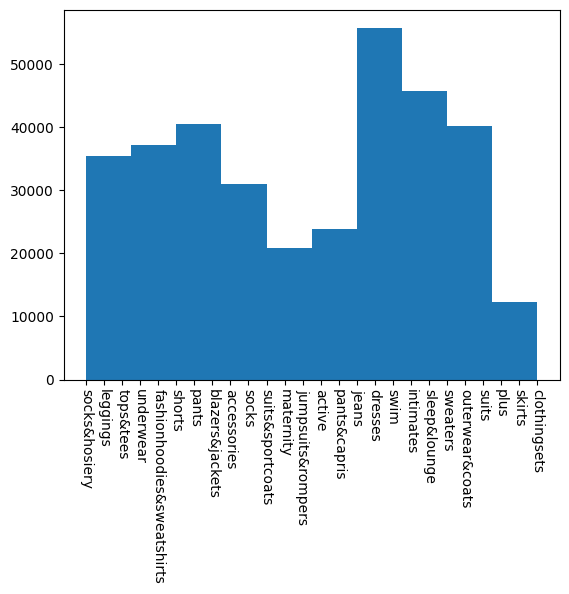

In [29]:
#Vẽ biểu đồ histogram thể hiện lượt xem của khách hàng đối với các loại sản phẩm
plt.hist(df_category1['category_x'])
plt.xticks(rotation=-90)

Theo đồ thị trên, có 9 loại sản phẩm được xem nhiều nhất: swim, tops&tees, intimates, sleep&lounge, active, shorts, sweaters, fashion hoodies&sweat shirts, pants. Điều này có thể do phần đề xuất hiển thị của trang web không đa dạng các loại sản phẩm cho người dùng.

## Phân tích doanh số theo loại sản phẩm

In [ ]:
#kết hợp 2 bảng orders và order_details theo order_id
table= pd.merge(df_order, df_orderde, on='order_id')
#kết hợp 2 bảng table và item theo id
table= pd.merge(table, df_item, on='id')[['cus_id','order_id','num_of_item','category']]
table.head()

,cus_id,order_id,num_of_item,category
0,1,1,2,Tops & Tees
1,1,1,2,Tops & Tees
2,2,2,1,Tops & Tees
3,3,3,3,Tops & Tees
4,3,3,3,Tops & Tees


In [ ]:
#tính tổng số lượng sản phẩm khách hàng mua theo loại sản phẩm
total_quantity = table.groupby(['category'])['num_of_item'].sum()
total_quantity

category
Accessories          2912
Active               2689
Blazers & Jackets    1024
Clothing Sets          75
Dresses              1854
Name: num_of_item, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Active'),
  Text(2, 0, 'Blazers & Jackets'),
  Text(3, 0, 'Clothing Sets'),
  Text(4, 0, 'Dresses'),
  Text(5, 0, 'Fashion Hoodies & Sweatshirts'),
  Text(6, 0, 'Intimates'),
  Text(7, 0, 'Jeans'),
  Text(8, 0, 'Jumpsuits & Rompers'),
  Text(9, 0, 'Leggings'),
  Text(10, 0, 'Maternity'),
  Text(11, 0, 'Outerwear & Coats'),
  Text(12, 0, 'Pants'),
  Text(13, 0, 'Pants & Capris'),
  Text(14, 0, 'Plus'),
  Text(15, 0, 'Shorts'),
  Text(16, 0, 'Skirts'),
  Text(17, 0, 'Sleep & Lounge'),
  Text(18, 0, 'Socks'),
  Text(19, 0, 'Socks & Hosiery'),
  Text(20, 0, 'Suits'),
  Text(21, 0, 'Suits & Sport Coats'),
  Text(22, 0, 'Sweaters'),
  Text(23, 0, 'Swim'),
  Text(24, 0, 'Tops & Tees'),
  Text(25, 0, 'Underwear')])

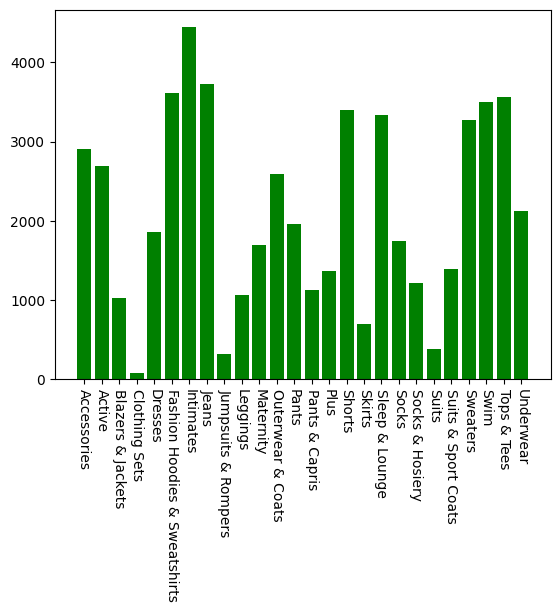

In [ ]:
#vẽ biểu đồ cột
plt.bar(total_quantity.index, total_quantity.values, color= 'green')
plt.xticks(rotation=-90)

Nhìn vào tổng số lượng sản phẩm bán ra theo loại sản phẩm, có thể thấy vẫn có sự chênh lệch giữa các loại sản phẩm, các loại sản phẩm như swim, tops&tees, intimates, sleep&lounge, active, shorts, sweaters, fashion hoodies&sweat shirts, pants. Đây cũng chính là những loại sản phẩm được xem nhiều trên web. Vậy, việc khách hàng xem sản phẩm có ảnh hưởng đến quyết định mua sản phẩm đó, hay nói cách khác, những loại sản phẩm được xem nhiều thì có khả năng được mua nhiều hơn. 

Nguyên nhân của điều này có thể là do trang web hiển thị ít lựa chọn về loại sản phẩm (tức là chỉ có 1 số loại sản phẩm được hiển thị với tần suất cao hơn hẳn các loại sản phẩm khác)